In [122]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')
sns.set_palette('viridis')

DATA_PATH_2020 = './data/2020.csv'
DATA_PATH_2019 = './data/2019.csv'
DATA_PATH_2018 = './data/2018.csv'

df_2018 = pd.read_csv(DATA_PATH_2018)
df_2019 = pd.read_csv(DATA_PATH_2019)
df_2020 = pd.read_csv(DATA_PATH_2020)

company_type = 'Company type'
age = 'Age'

def merge(data_frames, common_columns=[]):
    return pd.concat(data_frames, ignore_index=True)[common_columns]

def plt_cat_histogram(df, cat_colname, xlabel_rotation=90):
    col_counts = df[cat_colname].value_counts()
    sns.countplot(data=df, x=cat_colname, order=col_counts.index)
    plt.xticks(rotation=xlabel_rotation)
    plt.title(f'{cat_colname} Distribution')

def clean_company_types(df):
    cleaned_df = pd.DataFrame(columns=[company_type, age])
    for _, row in df.iterrows():
        if row[company_type] is not None and type(row[company_type]) is not float:
            # remove leading and trailing spaces
            # change to lower case
            processed_value = row[company_type].strip().lower().replace("-", "")
            if ("consult" in processed_value):
                cleaned_df.loc[len(cleaned_df.index)] = ['consultancy', row[age]]
            elif("research" in processed_value or "institut" in processed_value):
                cleaned_df.loc[len(cleaned_df.index)] = ['research', row[age]]
            elif ("commerc" in processed_value):
                cleaned_df.loc[len(cleaned_df.index)] = ['ecommerce', row[age]]
            elif ("corporat" in processed_value):
                cleaned_df.loc[len(cleaned_df.index)] = ['corporate', row[age]]
            else:
                cleaned_df.loc[len(cleaned_df.index)] = [processed_value, row[age]]
    return cleaned_df

In [123]:
merged_df = merge(data_frames=[df_2018, df_2019, df_2020], common_columns=[age, company_type])
assert merged_df.shape[0] == df_2018.shape[0] + df_2019.shape[0] + df_2020.shape[0]

## Analysis Outlines
- Perform the analysis per each year (consider the factor of time)
- Univariate analysis: the distribution of company types (pie chart)
- Bivariate analysis: relation between the age and the company types (box plot)
- Hypothesis testing: joining a company type depends on the age

### Univariate Analysis on Company Type

In [124]:
print("Before Cleaning")
print("Number of unique company types for 2018 responders", len(df_2018[company_type].unique()))
print("Number of unique company types for 2019 responders", len(df_2019[company_type].unique()))
print("Number of unique company types for 2020 responders", len(df_2020[company_type].unique()))
print("Total Number of unique company types", len(merged_df[company_type].unique()))


Before Cleaning
Number of unique company types for 2018 responders 50
Number of unique company types for 2019 responders 8
Number of unique company types for 2020 responders 64
Total Number of unique company types 102


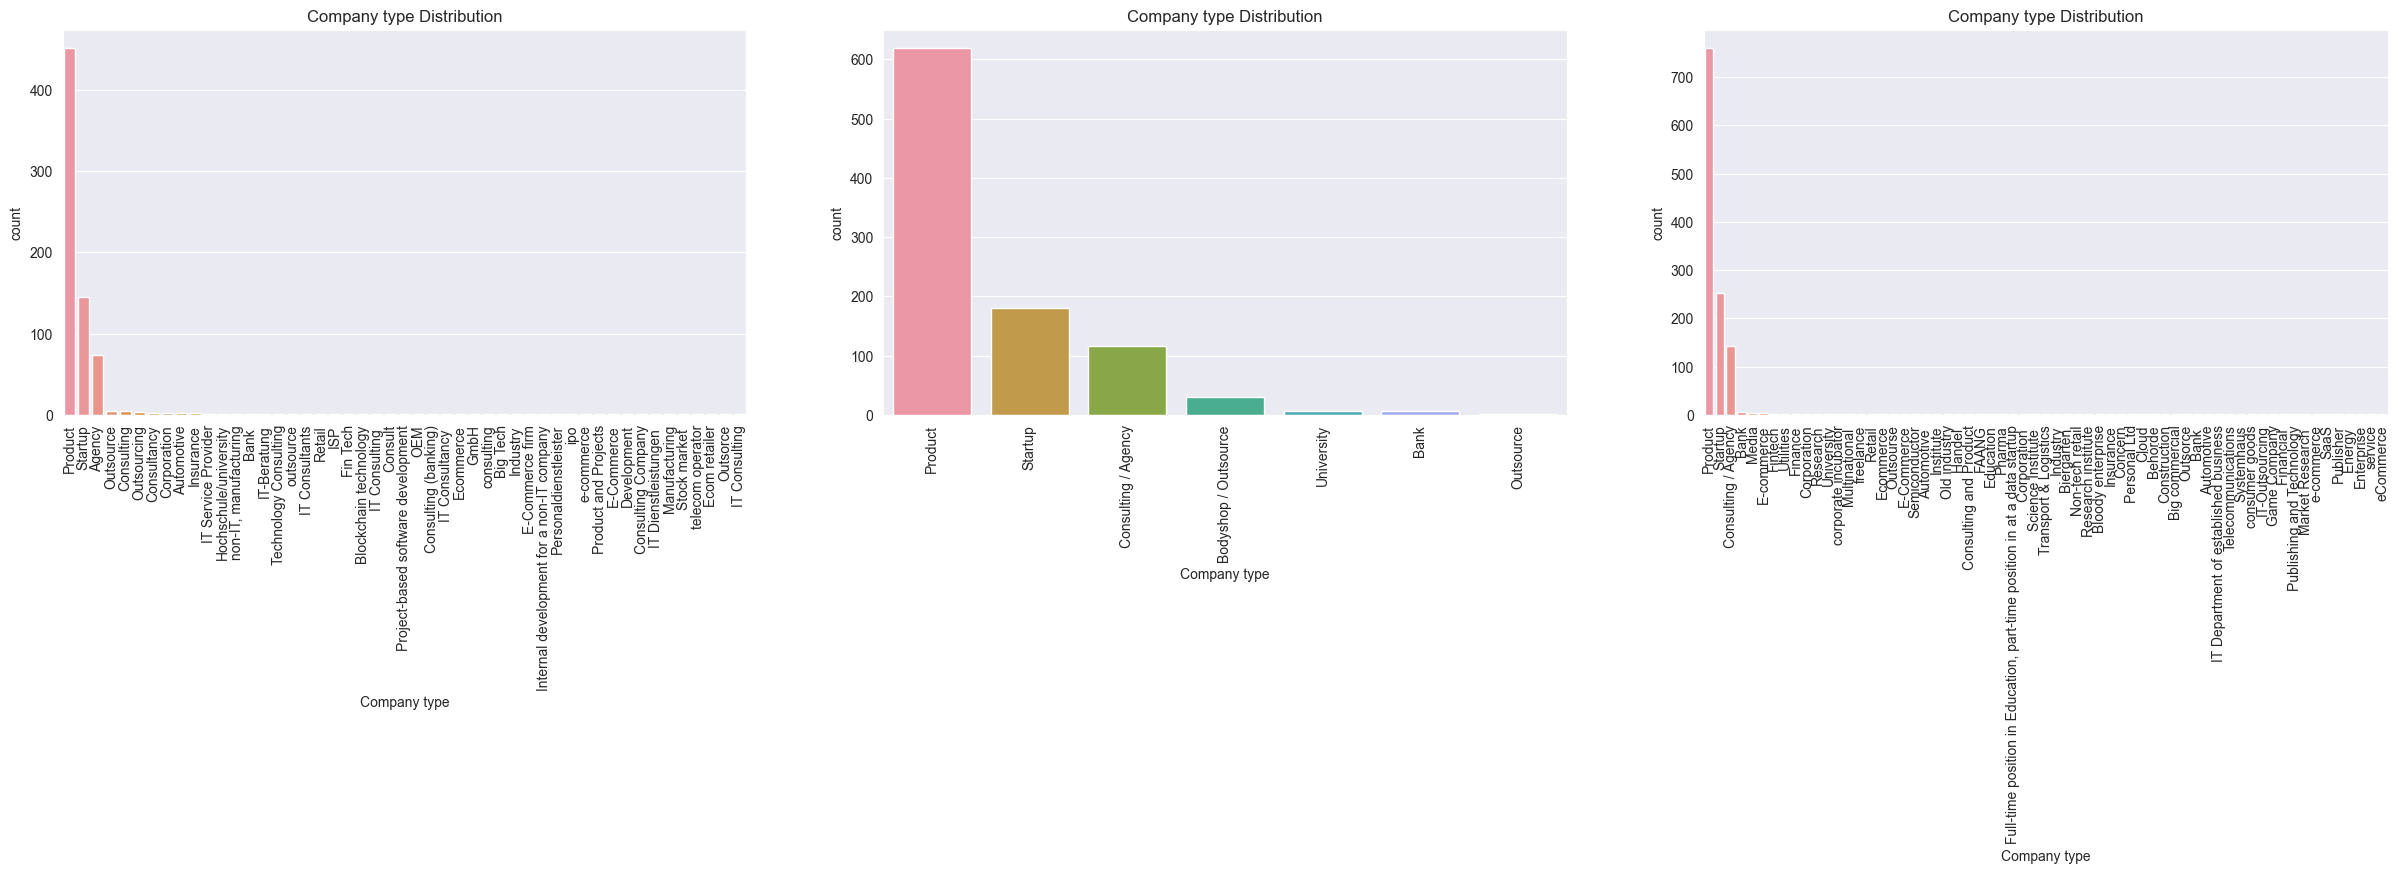

In [125]:
plt.figure(figsize=(30, 5))
plt.subplot(1, 3, 1)
plt_cat_histogram(df_2018, company_type)
plt.subplot(1, 3, 2)
plt_cat_histogram(df_2019, company_type)
plt.subplot(1, 3, 3)
plt_cat_histogram(df_2020, company_type)
plt.show()

#### Normalizing and Enforcing Consistency on Compnay Type

In [126]:
print("Before Normalizing, Number of unique types", len(merged_df[company_type].unique()))
cleaned_df = clean_company_types(merged_df)
print("After Normalizing, Number of unique types", len(cleaned_df[company_type].unique()))

Before Normalizing, Number of unique types 102
After Normalizing, Number of unique types 75


In [127]:
print("Before filtering out rows with low type frequency")
print("Number of unique types", len(cleaned_df[company_type].unique()))
print("# rows", cleaned_df.shape[0])

type_counts = cleaned_df[company_type].value_counts()
type_counts = type_counts[type_counts >= 5]
cleaned_df = cleaned_df[cleaned_df[company_type].isin(type_counts.index)]

print("After filtering out rows with low type frequency")
print("Number of unique types", len(cleaned_df[company_type].unique()))
print("# rows", cleaned_df.shape[0])


Before filtering out rows with low type frequency
Number of unique types 75
# rows 2918
After filtering out rows with low type frequency
Number of unique types 11
# rows 2839


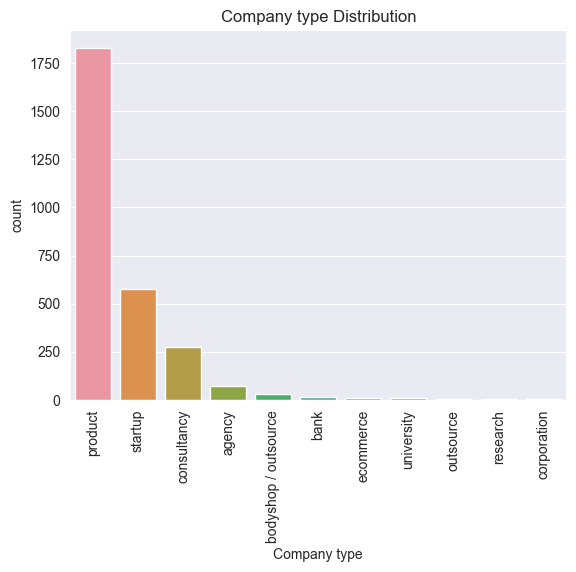

In [128]:
plt_cat_histogram(cleaned_df, company_type)

Recommendations for clustering the types for further cleaning

Product-based Companies: 'product', 'ecom retailer', 'ecommerce', 'retail', 'consumer goods', 'pharma', 'nontech retail'

Startup Companies: 'startup', 'bloody enterprise', 'corporate incubator', 'faang'

Consulting/Agency Companies: 'agency', 'consultancy', 'service', 'itberatung', 'it service provider', 'itoutsourcing', 'systemhaus'

Technology/IT Companies: 'big tech', 'outsource', 'bodyshop / outsource', 'outsourcing', 'outsorce', 'it dienstleistungen', 'it department of established business', 'itoutsourcing', 'it service provider', 'systemhaus'

Financial/Insurance Companies: 'insurance', 'ipo', 'bank', 'fin tech', 'financial'

University/Research Companies: 'university', 'hochschule/university', 'research'

Manufacturing/Industry Companies: 'industry', 'manufacturing', 'nonit, manufacturing', 'automotive', 'oem', 'construction', 'energy', 'semiconductor', 'utilities', 'old industry'

Telecom/Communication Companies: 'telecom operator', 'isp', 'telecommunications'

Media/Publishing Companies: 'media', 'publishing and technology', 'publisher'

Other Categories: 'gmbh', 'projectbased software development', 'cloud', 'behörde', 'fintech', 'game company', 'saas', 'transport & logistics', 'biergarten', 'education', 'fulltime position in education, parttime position in at a data startup', 'multinational', 'freelance', 'blockchain technology', 'stock market', 'faang', 'bloody enterprise', 'corporate incubator', 'outsourse'